# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [1]:
# Installing required packages 
%pip install opencv-contrib-python # Had to install the latest versions - older versions of libraries and python were giving alot of issues
%pip install scipy


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/Users/zainaqasim/Documents/UIUC Spring Courses/CS 445 Computational Photography/Project One- Hybrid Images/hybrid/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and /Users/zainaqasim/Documents/UIUC Spring Courses/CS 445 Computational Photography/Project One- Hybrid Images/hybrid/utils.py are identical (not copied).


In [13]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
#%matplotlib notebook  
import matplotlib.pyplot as plt

In [3]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

In [15]:
#pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
#plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

In [17]:
#pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [18]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [19]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

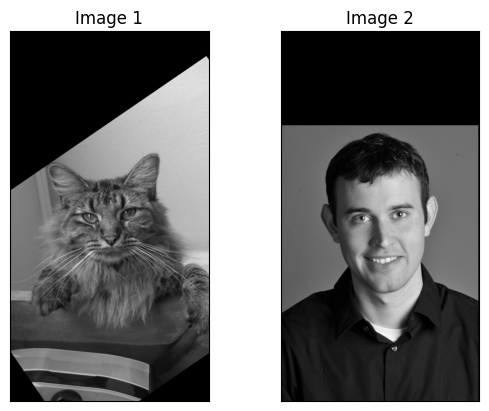

In [20]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

Text(0.5, 1.0, 'FFT of Image 2')

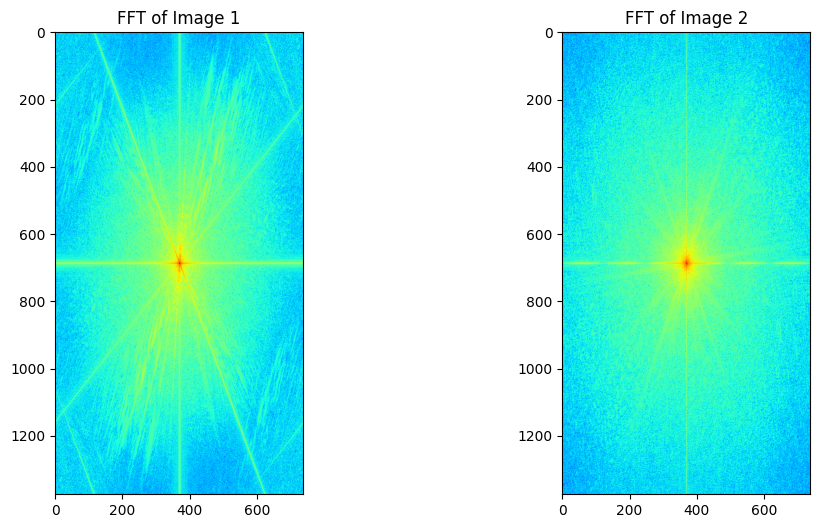

In [88]:
# FFT of images
fftmag_im1 = np.abs(np.fft.fftshift(np.fft.fft2(im1)))
fftmag_im2 = np.abs(np.fft.fftshift(np.fft.fft2(im2)))

plt.figure(figsize=(12, 6))

# Plot the magnitude of the FFTs
plt.subplot(1, 2, 1)
plt.imshow(fftmag_im1,norm=LogNorm(fftmag_im1.min(),fftmag_im1.max()),cmap='jet')
plt.title('FFT of Image 1')

plt.subplot(1, 2, 2)
plt.imshow(fftmag_im2,norm=LogNorm(fftmag_im2.min(),fftmag_im2.max()),cmap='jet')
plt.title('FFT of Image 2')




In [95]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
        
    ''' 
        
    # ksize = np.int(np.ceil(sigma)*6+1)
    # fil = cv2.getGaussianKernel(ksize, sigma) # 1D kernel
    # fil = fil*np.transpose(fil) # 2D kernel by outer product


    # Apply Gaussian low-pass filter to im1
    gauss_1d_kernel_low = cv2.getGaussianKernel(np.ceil(sigma_low)*6+1, sigma_low)
    gauss_2d_kernel_low = gauss_1d_kernel_low * np.transpose(gauss_1d_kernel_low)
    im1_low_pass = cv2.filter2D(im1, -1, gauss_2d_kernel_low)


    # Apply Implulse minus Gaussian high-pass filter to im2
    gauss_1d_kernel_high = cv2.getGaussianKernel(np.ceil(sigma_high)*6+1, sigma_high)
    gauss_2d_kernel_high = gauss_1d_kernel_high * np.transpose(gauss_1d_kernel_high)
    im2_high_pass = im2 - cv2.filter2D(im2, -1, gauss_2d_kernel_high)

    # Combine the low-pass and high-pass filtered images by averaging them
    hybrid_image = (im1_low_pass + im2_high_pass) / 2

    # Return the hybrid image
    return hybrid_image




In [96]:
sigma_low = 10 # choose parameters that work for your images
sigma_high = 100

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)



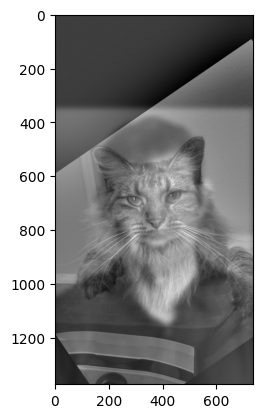

In [97]:
# Show the hybrid image
plt.imshow(im_hybrid, cmap='gray')
plt.show()





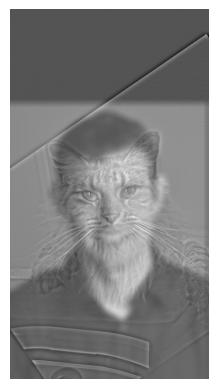

In [52]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W

#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift